In [1]:
# import libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

## Designing the CNN architecture for image classification

In [2]:
classifier = Sequential()


In [3]:
classifier.add(Conv2D(32,(3,3), input_shape=(200,200,3), activation = "relu"))
classifier.add(MaxPool2D(pool_size = (2,2)))

In [4]:
classifier.add(Conv2D(64,(3,3), activation = "relu"))
classifier.add(MaxPool2D(pool_size = (2,2)))

In [5]:
classifier.add(Conv2D(128,(3,3), activation = "relu"))
classifier.add(MaxPool2D(pool_size = (2,2)))

In [6]:
classifier.add(Flatten())

In [7]:
classifier.add(Dense(128, activation = "relu"))
classifier.add(Dense(2, activation ="sigmoid"))

In [8]:
classifier.compile(optimizer="adam", loss= "categorical_crossentropy", metrics = "accuracy")

In [9]:
dataset = "C:/Users/Tech Land/jupyter/dataset_covid"

In [10]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

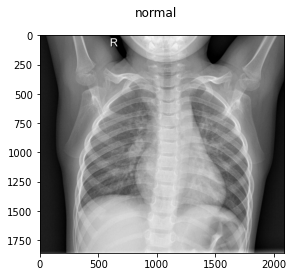

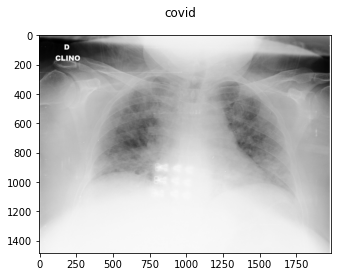

In [11]:
normal_images = []
for img_path in glob.glob(dataset + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 


covid_images = []
for img_path in glob.glob(dataset + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray')

In [12]:

data_generator = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

In [13]:
training_dataset = data_generator.flow_from_directory(dataset,
                                                      target_size=(200,200),
                                                      class_mode="categorical",
                                                      batch_size=10,
                                                      subset='training'
                                                     )
test_dataset = data_generator.flow_from_directory(dataset,
                                                  
                                                  target_size=(200,200),
                                                  batch_size=10,
                                                  class_mode="categorical",
                                                  subset='validation'
                                                 )
                                                
                                                

Found 76 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [14]:
#step_size_train = (76//3)/2
#step_size_test = (18//3)/2

In [15]:
history= classifier.fit(training_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
8/8 [==============================] - 19s 871ms/step - loss: 1.0586 - accuracy: 0.4631 - val_loss: 0.5878 - val_accuracy: 0.7222
Epoch 2/5
8/8 [==============================] - 6s 708ms/step - loss: 0.5328 - accuracy: 0.7832 - val_loss: 0.3435 - val_accuracy: 0.8889
Epoch 3/5
8/8 [==============================] - 6s 712ms/step - loss: 0.3654 - accuracy: 0.8712 - val_loss: 0.3988 - val_accuracy: 0.8333
Epoch 4/5
8/8 [==============================] - 6s 719ms/step - loss: 0.1619 - accuracy: 0.9550 - val_loss: 0.0760 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 6s 674ms/step - loss: 0.2909 - accuracy: 0.9033 - val_loss: 0.2763 - val_accuracy: 0.8889


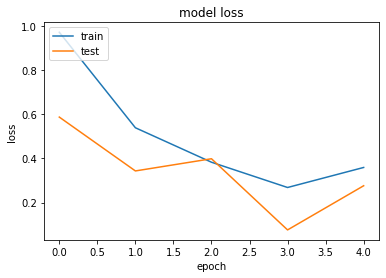

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

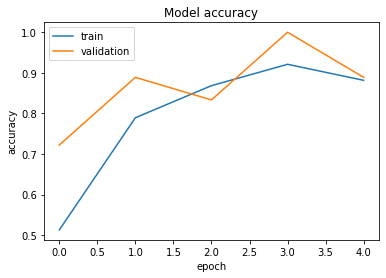

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc= 'upper left')
plt.show()